In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

In [48]:
df = pd.read_csv('results.csv')
df = df.drop('face_id', axis=1).reset_index(drop=True)
df.head()

,real_age,real_gender,real_race,detected_age,detected_gender,detected_race,result_quality
0,20-30,Male,White,26,Male (98%),Middle Eastern (40%),4
1,1-10,Male,White,14,Female (96%),White (63%),4
2,1-10,Female,Indian,33,Female (88%),Latino (34%),3
3,30-40,Female,White,32,Female (100%),White (79%),10
4,20-30,Female,White,27,Female (100%),White (100%),10


Add auxiliary columns for analysis

In [49]:
def get_percent(res):
    match = re.findall(r'\((\d+)%\)', str(res)) 
    return int(match[0]) if match else None

def get_text(res):
    match = re.findall(r'([a-zA-Z\s]+) \(\d+%\)', str(res)) 
    return match[0].strip() if match else None

# Split the detection result and percent
df['detected_gender_text'] = df['detected_gender'].apply(get_text)
df['detected_gender_pct'] = df['detected_gender'].apply(get_percent)
df['detected_race_text'] = df['detected_race'].apply(get_text)
df['detected_race_pct'] = df['detected_race'].apply(get_percent)

# Convert detected_race_text safely to string
df['detected_race_text'] = df['detected_race_text'].astype(str)

df

,real_age,real_gender,real_race,detected_age,detected_gender,detected_race,result_quality,detected_gender_text,detected_gender_pct,detected_race_text,detected_race_pct
0,20-30,Male,White,26,Male (98%),Middle Eastern (40%),4,Male,98,Middle Eastern,40
1,1-10,Male,White,14,Female (96%),White (63%),4,Female,96,White,63
2,1-10,Female,Indian,33,Female (88%),Latino (34%),3,Female,88,Latino,34
3,30-40,Female,White,32,Female (100%),White (79%),10,Female,100,White,79
4,20-30,Female,White,27,Female (100%),White (100%),10,Female,100,White,100
...,...,...,...,...,...,...,...,...,...,...,...
85,20-30,Female,Latino,28,Female (93%),Latino (54%),7,Female,93,Latino,54
86,30-40,Male,Asian,36,Male (98%),Asian (93%),9,Male,98,Asian,93
87,10-20,Male,White,18,Female (81%),White (60%),3,Female,81,White,60
88,40-50,Female,Indian,44,Female (90%),Middle Eastern (40%),5,Female,90,Middle Eastern,40


In [50]:
# Compute real age midpoint
def midpoint(age_range):
    try:
        parts = age_range.split('-')
        return (int(parts[0]) + int(parts[1])) / 2
    except:
        return np.nan

df['real_age_mid'] = df['real_age'].apply(midpoint)

# Age error
df['age_error'] = abs(df['detected_age'] - df['real_age_mid'])

# Gender correctness
df['gender_correct'] = df['real_gender'].str.strip().str.lower() == df['detected_gender_text'].str.strip().str.lower()

# Race correctness
df['race_correct'] = df['real_race'].str.strip().str.lower() == df['detected_race_text'].str.strip().str.lower()

df

,real_age,real_gender,real_race,detected_age,detected_gender,detected_race,result_quality,detected_gender_text,detected_gender_pct,detected_race_text,detected_race_pct,real_age_mid,age_error,gender_correct,race_correct
0,20-30,Male,White,26,Male (98%),Middle Eastern (40%),4,Male,98,Middle Eastern,40,25.0,1.0,True,False
1,1-10,Male,White,14,Female (96%),White (63%),4,Female,96,White,63,5.5,8.5,False,True
2,1-10,Female,Indian,33,Female (88%),Latino (34%),3,Female,88,Latino,34,5.5,27.5,True,False
3,30-40,Female,White,32,Female (100%),White (79%),10,Female,100,White,79,35.0,3.0,True,True
4,20-30,Female,White,27,Female (100%),White (100%),10,Female,100,White,100,25.0,2.0,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,20-30,Female,Latino,28,Female (93%),Latino (54%),7,Female,93,Latino,54,25.0,3.0,True,True
86,30-40,Male,Asian,36,Male (98%),Asian (93%),9,Male,98,Asian,93,35.0,1.0,True,True
87,10-20,Male,White,18,Female (81%),White (60%),3,Female,81,White,60,15.0,3.0,False,True
88,40-50,Female,Indian,44,Female (90%),Middle Eastern (40%),5,Female,90,Middle Eastern,40,45.0,1.0,True,False


General distribution plots for real age, real gender, and real race

C:\Users\hsayc\AppData\Local\Temp\ipykernel_31488\1593394186.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='real_gender', data=df, palette='viridis', ax=axes[1])
C:\Users\hsayc\AppData\Local\Temp\ipykernel_31488\1593394186.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='real_race', data=df, palette='magma', ax=axes[2])


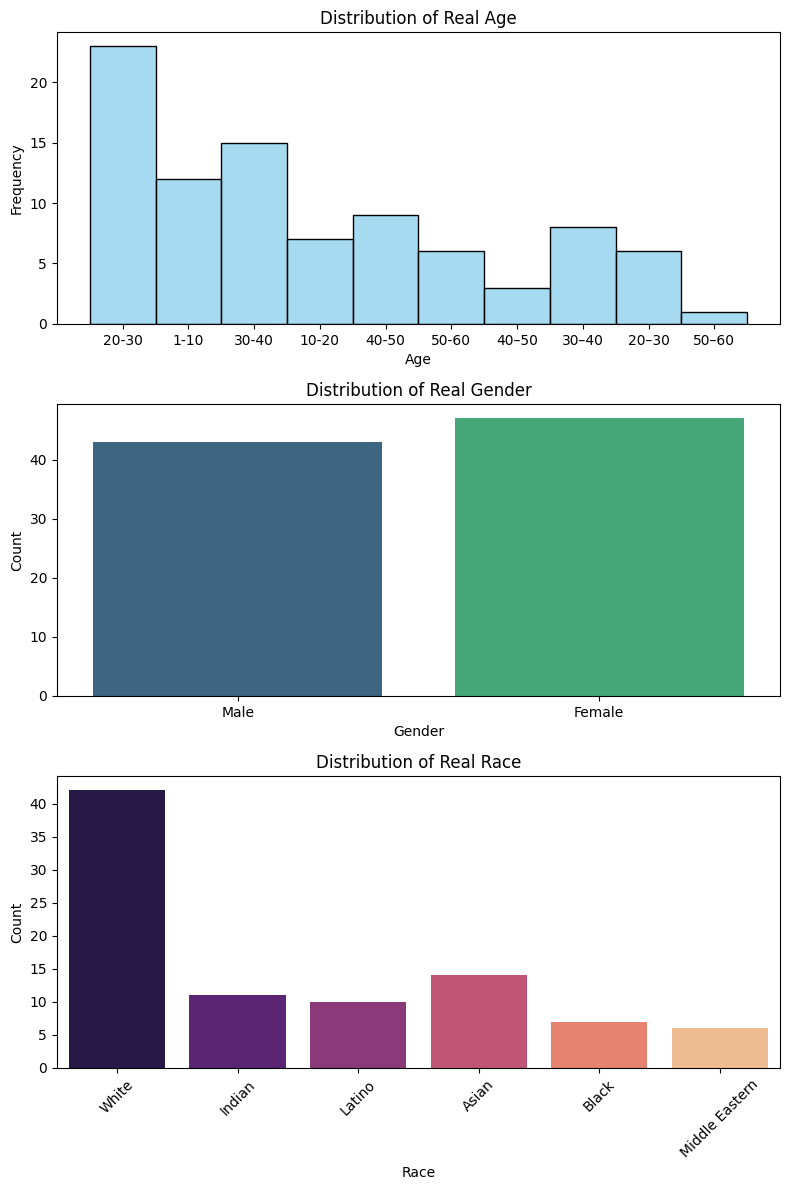

In [51]:
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# Plot distribution of real age
sns.histplot(df['real_age'], bins=20, color='skyblue', ax=axes[0])
axes[0].set_title('Distribution of Real Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Plot distribution of real gender
sns.countplot(x='real_gender', data=df, palette='viridis', ax=axes[1])
axes[1].set_title('Distribution of Real Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')

# Plot distribution of real race
sns.countplot(x='real_race', data=df, palette='magma', ax=axes[2])
axes[2].set_title('Distribution of Real Race')
axes[2].set_xlabel('Race')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Age Error by Race

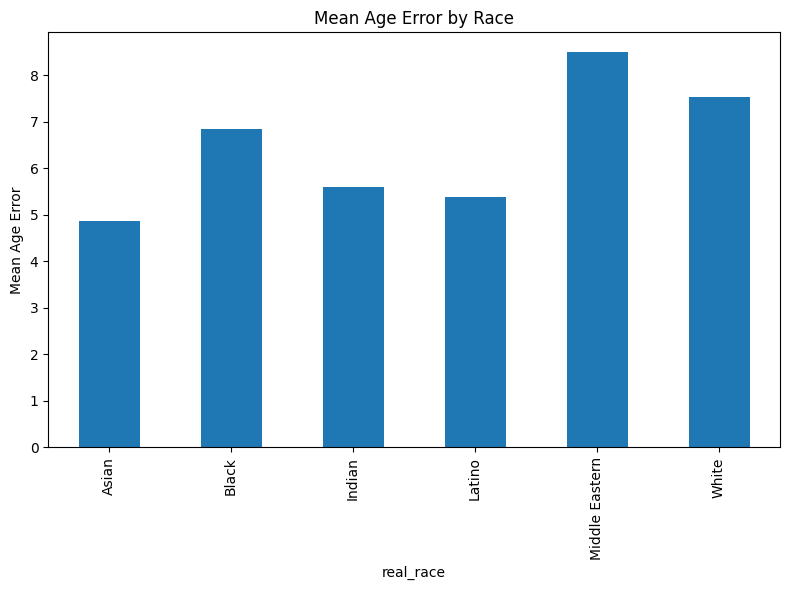

In [52]:
plt.figure(figsize=(8,6))
df.groupby('real_race')['age_error'].mean().plot(kind='bar')
plt.ylabel("Mean Age Error")
plt.title("Mean Age Error by Race")
plt.tight_layout()
plt.show()

Gender Misclassification by Race

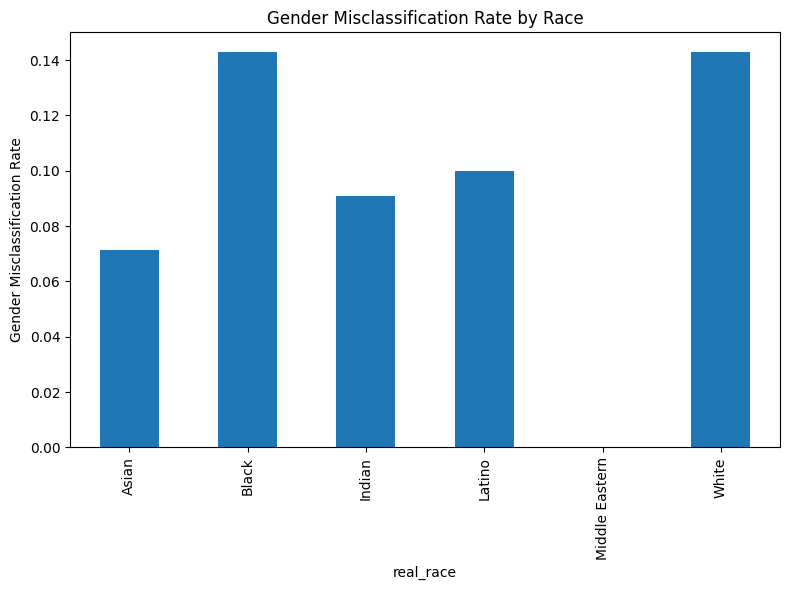

In [53]:
plt.figure(figsize=(8,6))
(df.groupby('real_race')['gender_correct'].mean().apply(lambda x: 1-x)).plot(kind='bar')
plt.ylabel("Gender Misclassification Rate")
plt.title("Gender Misclassification Rate by Race")
plt.tight_layout()
plt.show()

Race confusion matrix

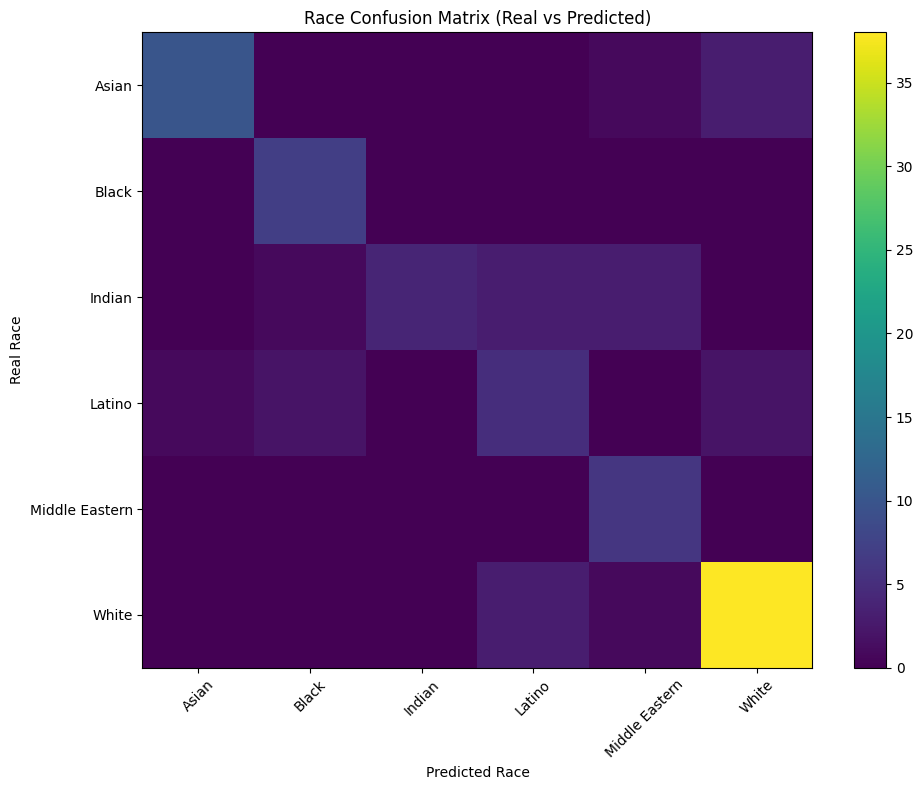

In [54]:
races = sorted(df['real_race'].unique())
pred_races = sorted(df['detected_race_text'].unique())
matrix = pd.DataFrame(0, index=races, columns=pred_races)

for _, row in df.iterrows():
    matrix.loc[row['real_race'], row['detected_race_text']] += 1

plt.figure(figsize=(10,8))
plt.imshow(matrix.values, aspect='auto')
plt.xticks(range(len(pred_races)), pred_races, rotation=45)
plt.yticks(range(len(races)), races)
plt.colorbar()
plt.title("Race Confusion Matrix (Real vs Predicted)")
plt.xlabel("Predicted Race")
plt.ylabel("Real Race")
plt.tight_layout()
plt.show()

Detected race confidence by real race

<Figure size 800x600 with 0 Axes>

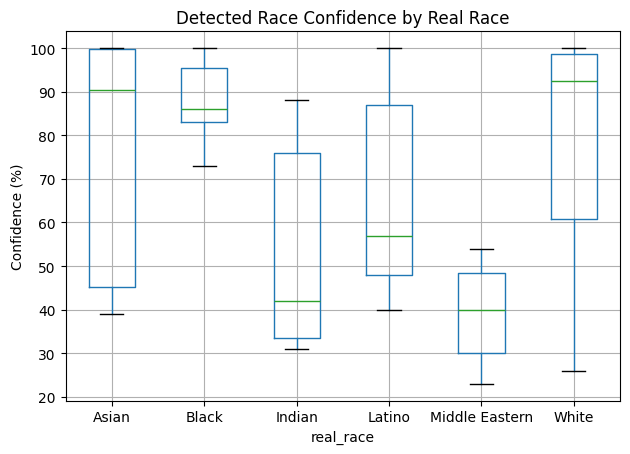

In [55]:
plt.figure(figsize=(8,6))
df.boxplot(column='detected_race_pct', by='real_race')
plt.title("Detected Race Confidence by Real Race")
plt.suptitle("")
plt.ylabel("Confidence (%)")
plt.tight_layout()
plt.show()

Result quality by race

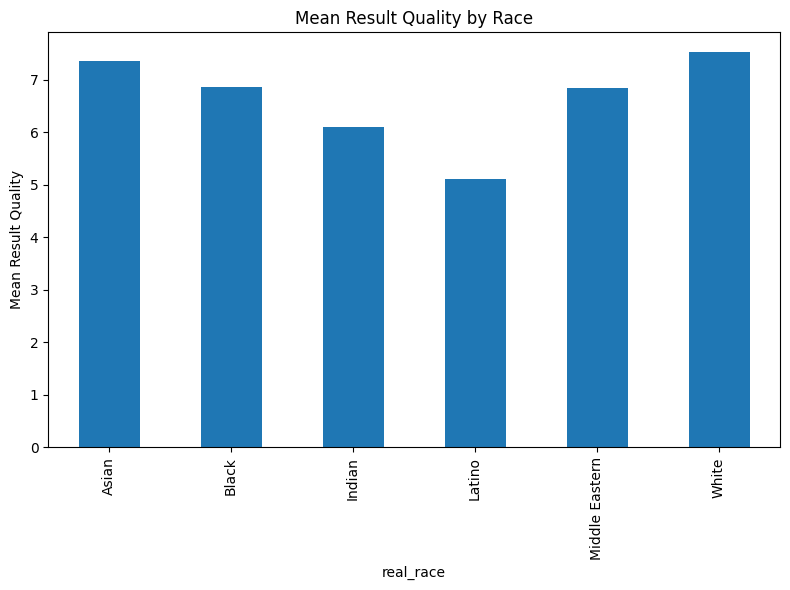

In [56]:
plt.figure(figsize=(8,6))
df.groupby('real_race')['result_quality'].mean().plot(kind='bar')
plt.ylabel("Mean Result Quality")
plt.title("Mean Result Quality by Race")
plt.tight_layout()
plt.show()